# <font color=Purple>COMP5310 - Project Stage 1 - Data Acquisition and Cleaning</font> ❤️‍🩹

### <font color=Purple>Importing libraries</font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

### <font color=Purple>Reading the data</font>

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Show first 10 rows
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Shape of dataframe
heart_df.shape

(918, 12)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [7]:
# Numerical Variables
numerical = heart_df.select_dtypes(exclude = object).columns
numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [8]:
# Categorical Variables
categorical = heart_df.select_dtypes(include = object).columns
categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [9]:
# Descriptive statistics of dataset - mean, std, min, max etc
heart_df.describe().style.background_gradient(cmap = 'Purples')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# Check if there are any unique values
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<font color=Purple>Let's have a look at the correlation analysis of the dataset which will measure the strength and direction of the relationship between two variables.</font>

<AxesSubplot:>

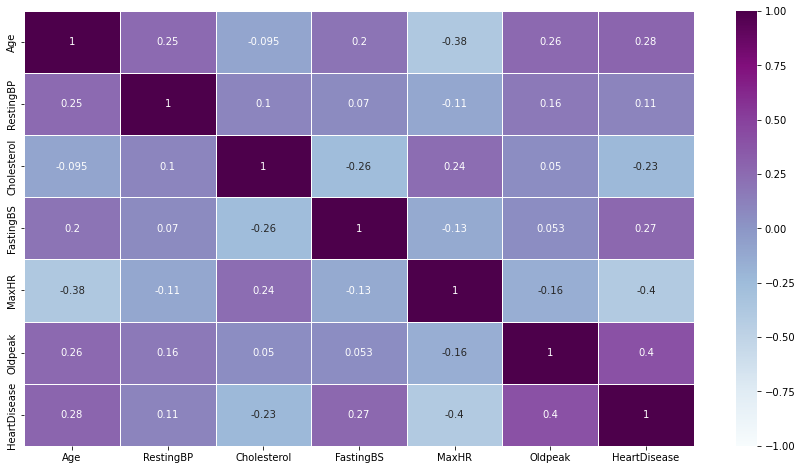

In [11]:
corr = heart_df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, cmap = 'BuPu', vmin = -1, vmax = 1, center = 0,
           annot = True, linewidth = .5, square = False)

### <font color=Purple>Data Pre-processing</font>

<font color=Purple>The purpose of pre-processing the dataset is to identify any missing values, duplication and in general find any noteworthy observations.</font>

In [12]:
# To check null values
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<font color=Purple>We observe no null values.</font>

In [13]:
# Check duplicate values
duplicates = heart_df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [14]:
heart_df.drop_duplicates(inplace = True) 
heart_df.shape

(918, 12)

<font color=Purple>No observation of duplicate values in heart dataset. We can conclude this before the shape of the dataset is unchanged from output line 5.</font>

<font color=Purple>Let's explore the distribution for each of the columns to get a better understanding of the range of values prior to data analysis. The seaborn library will be particularly useful here. </font>

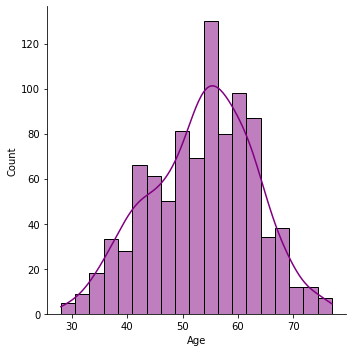

In [15]:
sns.displot(heart_df['Age'], color = 'Purple', kde = True)

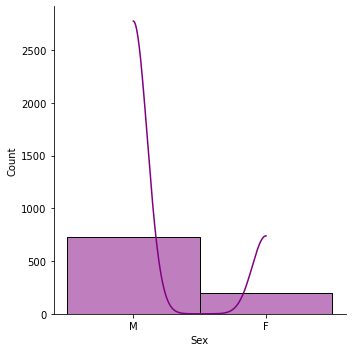

In [16]:
sns.displot(heart_df['Sex'], color = 'Purple', kde = True)

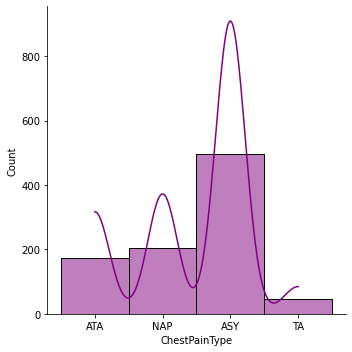

In [17]:
sns.displot(heart_df['ChestPainType'], color = 'Purple', kde = True)

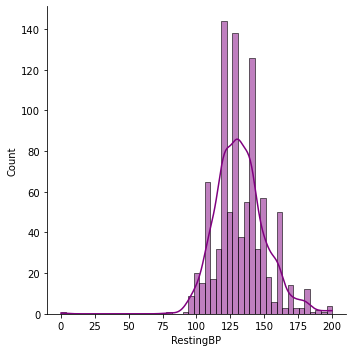

In [18]:
sns.displot(heart_df['RestingBP'], color = 'Purple', kde = True)

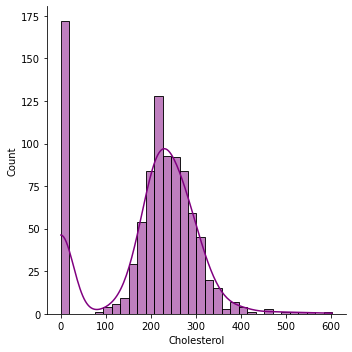

In [19]:
sns.displot(heart_df['Cholesterol'], color = 'Purple', kde = True)

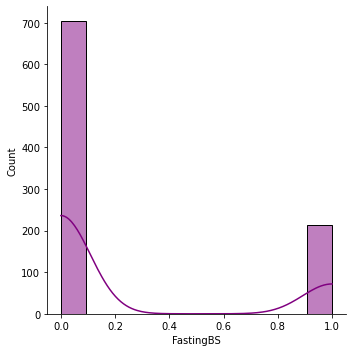

In [20]:
sns.displot(heart_df['FastingBS'], color = 'Purple', kde = True)

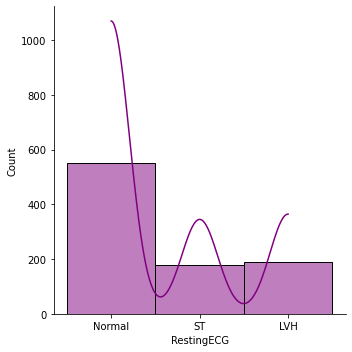

In [21]:
sns.displot(heart_df['RestingECG'], color = 'Purple', kde = True)

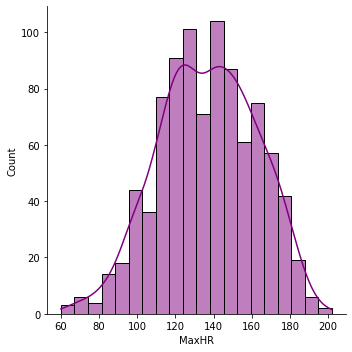

In [22]:
sns.displot(heart_df['MaxHR'], color = 'Purple', kde = True)

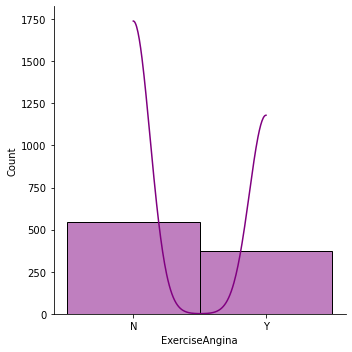

In [23]:
sns.displot(heart_df['ExerciseAngina'], color = 'Purple', kde = True)

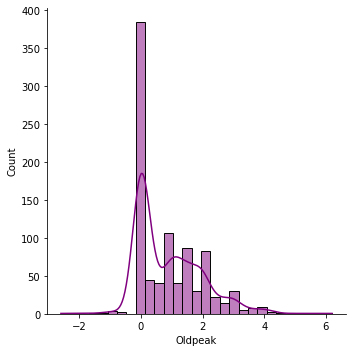

In [24]:
sns.displot(heart_df['Oldpeak'], color = 'Purple', kde = True)

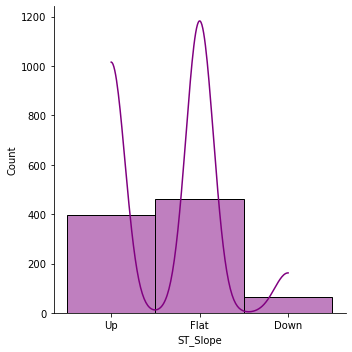

In [25]:
sns.displot(heart_df['ST_Slope'], color = 'Purple', kde = True)

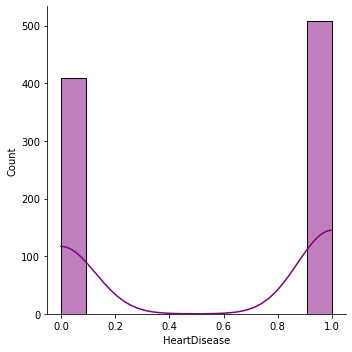

In [26]:
sns.displot(heart_df['HeartDisease'], color = 'Purple', kde = True)

### <font color=Purple>Data Transformation on Categorical Features</font>

<font color=Purple>Let's first visualise the outliers which may be present in our dataset, through boxplots</font>

In [27]:
# Select categorical variables
categ = heart_df.select_dtypes(include=object).columns

# One hot encoding
heart_df = pd.get_dummies(heart_df, columns=categ, drop_first=True)  
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [28]:
heart_df.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0
917,38,138,175,0,173,0.0,0,1,0,1,0,1,0,0,0,1


### <font color=Purple>END OF THE NOTEBOOK</font>

# <font color=Purple>COMP5310 - Project Stage 2 - Data Summarisation and Analysis</font> ❤️‍🩹

### <font color=Purple>Importing libraries</font>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


KeyError: 'age'

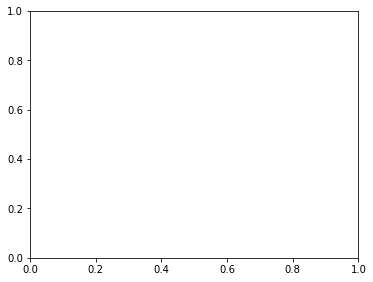

In [34]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(df['age'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
plt.hist(df['creatinine_phosphokinase'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.title('Distribution of Creatinine Phosphokinase')

plt.subplot(2, 3, 3)
plt.hist(df['ejection_fraction'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.title('Distribution of Ejection Fraction')

plt.subplot(2, 3, 4)
plt.hist(df['platelets'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.title('Distribution of Platelets')

plt.subplot(2, 3, 5)
plt.hist(df['serum_creatinine'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Creatinine')

plt.subplot(2, 3, 6)
plt.hist(df['serum_sodium'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Serum Sodium')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Sodium')

plt.show()
